In [1]:
#Importing all the needed libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
df=pd.read_csv(r"spotify dataset.csv")#Loading the dataset

In [3]:
df.isnull().sum()#Checking null values of each column

track_id                    0
track_name                  5
track_artist                5
track_popularity            0
track_album_id              0
track_album_name            5
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64

In [4]:
df.dropna()#deleting the rows containing null values

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.102000,0.000000,0.0653,0.5180,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.072400,0.004210,0.3570,0.6930,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.079400,0.000023,0.1100,0.6130,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.028700,0.000009,0.2040,0.2770,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.080300,0.000000,0.0833,0.7250,123.976,189052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32828,7bxnKAamR3snQ1VGLuVfC1,City Of Lights - Official Radio Edit,Lush & Simon,42,2azRoBBWEEEYhqV6sb7JrT,City Of Lights (Vocal Mix),2014-04-28,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,2,-1.814,1,0.0936,0.076600,0.000000,0.0668,0.2100,128.170,204375
32829,5Aevni09Em4575077nkWHz,Closer - Sultan & Ned Shepard Remix,Tegan and Sara,20,6kD6KLxj7s8eCE3ABvAyf5,Closer Remixed,2013-03-08,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,0,-4.462,1,0.0420,0.001710,0.004270,0.3750,0.4000,128.041,353120
32830,7ImMqPP3Q1yfUHvsdn7wEo,Sweet Surrender - Radio Edit,Starkillers,14,0ltWNSY9JgxoIZO4VzuCa6,Sweet Surrender (Radio Edit),2014-04-21,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,6,-4.899,0,0.0481,0.108000,0.000001,0.1500,0.4360,127.989,210112
32831,2m69mhnfQ1Oq6lGtXuYhgX,Only For You - Maor Levi Remix,Mat Zo,15,1fGrOkHnHJcStl14zNx8Jy,Only For You (Remixes),2014-01-01,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,2,-3.361,1,0.1090,0.007920,0.127000,0.3430,0.3080,128.008,367432


In [5]:
df.info()#Column names and their data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

In [6]:
df["track_name"].unique()

array(["I Don't Care (with Justin Bieber) - Loud Luxury Remix",
       'Memories - Dillon Francis Remix',
       'All the Time - Don Diablo Remix', ...,
       'Sweet Surrender - Radio Edit', 'Only For You - Maor Levi Remix',
       'Typhoon - Original Mix'], dtype=object)

In [7]:
df["track_popularity"].unique()#big data set

array([ 66,  67,  70,  60,  69,  62,  68,  58,  63,  65,  35,  64,   8,
        30,  56,  55,  59,  87,  83,  61,  57,  53,  34,  74,  46,  52,
        45,  51,  48,  39,  71,  81,  85,  76,  75,  73,  79,  16,  84,
        37,  36,  72,  77,  82,  41,   5,  24,  18,  47,  80,  96,  86,
        19,  27,  43,  91,  42,  21,  54,   9,  23,  40,   2,  11,  50,
        10,  49,   6,  25,  95,   1,   4,  28,  29,  38,  17,  31,  26,
        32,  12,  44,   7,   0,  13,  78,  88,  94,  22,  98,  97,  90,
        93,  92,   3,  33,  20,  14,  15,  89, 100,  99])

In [8]:
df["track_album_name"].unique()

array(["I Don't Care (with Justin Bieber) [Loud Luxury Remix]",
       'Memories (Dillon Francis Remix)',
       'All the Time (Don Diablo Remix)', ...,
       'Sweet Surrender (Radio Edit)', 'Only For You (Remixes)',
       'Typhoon/Storm'], dtype=object)

In [9]:
df["playlist_name"].unique()#very large variation

array(['Pop Remix', 'Dance Pop', 'Dance Room', 'Cardio', 'Dance Pop Hits',
       'Pop Warmup 130 BPM', 'Dance Pop: Japan', 'K-Party Dance Mix',
       'Dance Pop Tunes', 'Pop / Dance', 'Todo Éxitos', '90s Dance Hits',
       'Christian Dance Party', 'Pop Dance Hits',
       'Best of 2019 Dance Pop: Japan',
       'Ultimate Indie Presents... Best Indie Tracks of the 2010s',
       'TUNES DANCE AND POP',
       'Pop Inglés (2020 - 2010s)💙 Música En Inglés 2010s',
       'ELETRIC POP & DANCE',
       'Pop - Pop UK - 2019 - Canadian Pop - 2019 - Pop',
       'The Sound of Post-Teen Pop', 'Post teen pop',
       'post-teen alternative, indie, pop (large variety)',
       'Pop Punk | Post-Hardcore', 'Post pop teen',
       'Intro to Post-Teen Pop', '🤩🤪Post Teen Pop🤪🤩',
       'Someone You Loved Lewis Capaldi (Pop Music Mix)',
       "Dr. Q's Prescription Playlist💊", 'a taste of the mainstream',
       'post teen pop', 'BALLARE - رقص', 'Post Teen Pop', 'Post-Teen Pop',
       'Post-teen pop'

In [10]:
df["playlist_genre"].unique()

array(['pop', 'rap', 'rock', 'latin', 'r&b', 'edm'], dtype=object)

In [11]:
df["playlist_subgenre"].unique()

array(['dance pop', 'post-teen pop', 'electropop', 'indie poptimism',
       'hip hop', 'southern hip hop', 'gangster rap', 'trap',
       'album rock', 'classic rock', 'permanent wave', 'hard rock',
       'tropical', 'latin pop', 'reggaeton', 'latin hip hop',
       'urban contemporary', 'hip pop', 'new jack swing', 'neo soul',
       'electro house', 'big room', 'pop edm',
       'progressive electro house'], dtype=object)

In [12]:
df['playlist_genre'].value_counts()

playlist_genre
edm      6043
rap      5746
pop      5507
r&b      5431
latin    5155
rock     4951
Name: count, dtype: int64

In [13]:
df["playlist_subgenre"].value_counts()

playlist_subgenre
progressive electro house    1809
southern hip hop             1675
indie poptimism              1672
latin hip hop                1656
neo soul                     1637
pop edm                      1517
electro house                1511
hard rock                    1485
gangster rap                 1458
electropop                   1408
urban contemporary           1405
hip hop                      1322
dance pop                    1298
classic rock                 1296
trap                         1291
tropical                     1288
latin pop                    1262
hip pop                      1256
big room                     1206
new jack swing               1133
post-teen pop                1129
permanent wave               1105
album rock                   1065
reggaeton                     949
Name: count, dtype: int64

In [14]:
df["playlist_subgenre"].value_counts()

playlist_subgenre
progressive electro house    1809
southern hip hop             1675
indie poptimism              1672
latin hip hop                1656
neo soul                     1637
pop edm                      1517
electro house                1511
hard rock                    1485
gangster rap                 1458
electropop                   1408
urban contemporary           1405
hip hop                      1322
dance pop                    1298
classic rock                 1296
trap                         1291
tropical                     1288
latin pop                    1262
hip pop                      1256
big room                     1206
new jack swing               1133
post-teen pop                1129
permanent wave               1105
album rock                   1065
reggaeton                     949
Name: count, dtype: int64

In [15]:
df["track_name"].unique()

array(["I Don't Care (with Justin Bieber) - Loud Luxury Remix",
       'Memories - Dillon Francis Remix',
       'All the Time - Don Diablo Remix', ...,
       'Sweet Surrender - Radio Edit', 'Only For You - Maor Levi Remix',
       'Typhoon - Original Mix'], dtype=object)

In [16]:
df["track_name"].value_counts().unique()

array([22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10,  9,  8,  7,  6,
        5,  4,  3,  2,  1])

In [ ]:
#GRAPHS

Text(0.5, 1.0, 'Track popularity vs loudness')

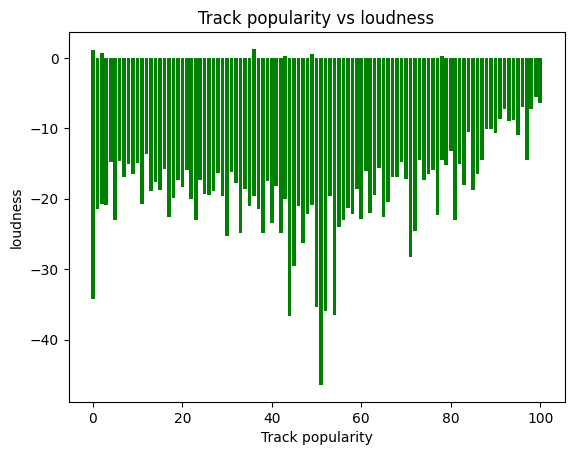

In [17]:
plt.bar(df["track_popularity"],df["loudness"],color=['g'])
plt.xlabel("Track popularity")
plt.ylabel("loudness")
plt.title("Track popularity vs loudness")

Text(0.5, 1.0, 'Track popularity vs speechiness')

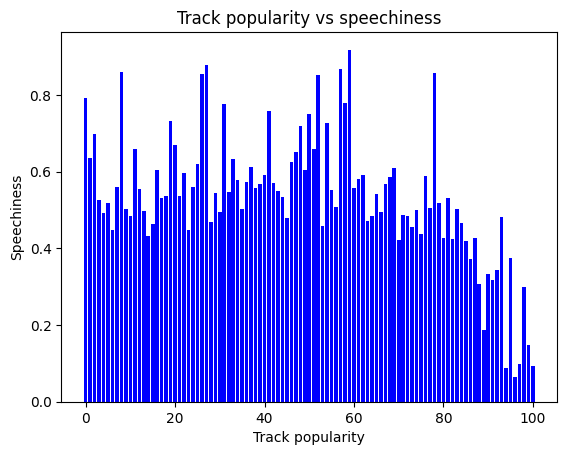

In [18]:
plt.bar(df["track_popularity"],df["speechiness"],color=['b'])#2
plt.xlabel("Track popularity")
plt.ylabel("Speechiness")
plt.title("Track popularity vs speechiness")

Text(0.5, 1.0, 'Track popularity vs acousticness')

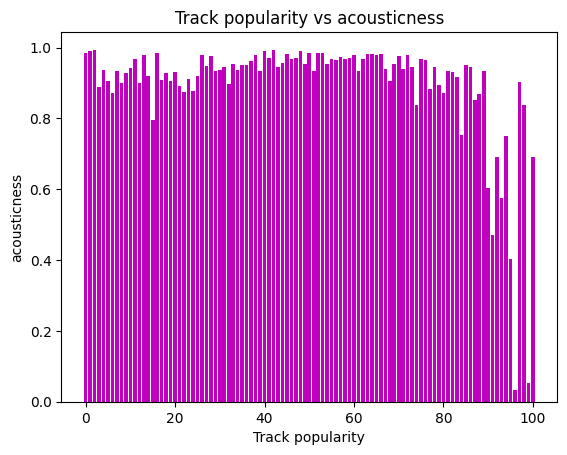

In [19]:
plt.bar(df["track_popularity"],df["acousticness"],color=['m'])
plt.xlabel("Track popularity")
plt.ylabel("acousticness")
plt.title("Track popularity vs acousticness")

/var/folders/wv/99nbhxrj3hs44dnw8ncy2rjm0000gn/T/ipykernel_1388/2664596659.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='playlist_genre', data=df, order=df['playlist_genre'].value_counts().index, palette='viridis')


Text(0, 0.5, 'Playlist genre')

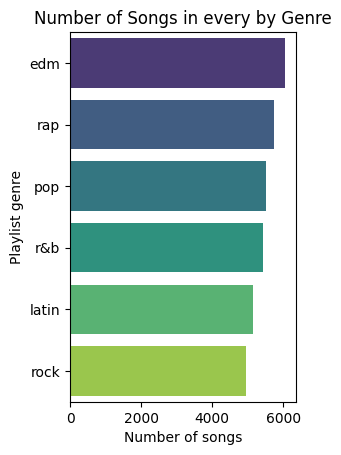

In [20]:
plt.subplot(1, 2, 1)
sns.countplot(y='playlist_genre', data=df, order=df['playlist_genre'].value_counts().index, palette='viridis')
plt.title('Number of Songs in every by Genre')
plt.xlabel('Number of songs')
plt.ylabel('Playlist genre')

/var/folders/wv/99nbhxrj3hs44dnw8ncy2rjm0000gn/T/ipykernel_1388/3877327568.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='playlist_subgenre', data=df, order=df['playlist_subgenre'].value_counts().index, palette='viridis')


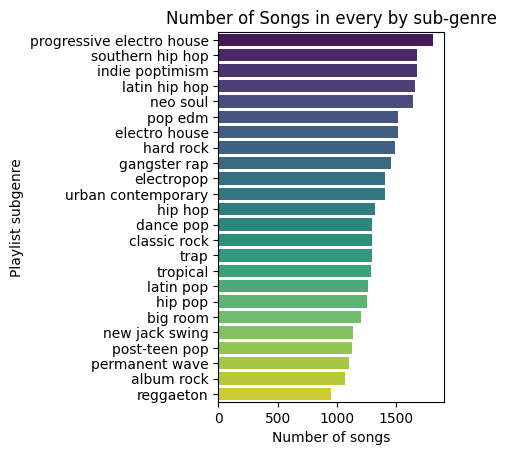

In [21]:
plt.subplot(1, 2, 1)
sns.countplot(y='playlist_subgenre', data=df, order=df['playlist_subgenre'].value_counts().index, palette='viridis')
plt.title('Number of Songs in every by sub-genre')
plt.xlabel('Number of songs')
plt.ylabel('Playlist subgenre')
plt.show()

In [22]:
df1=df.loc[:,["danceability","energy","key","mode","valence"]]#important features to be mapped

In [22]:
df1=df.loc[:,["danceability","energy","key","mode","valence"]]#important features to be mapped

In [22]:
df1=df.loc[:,["danceability","energy","key","mode","valence"]]#important features to be mapped

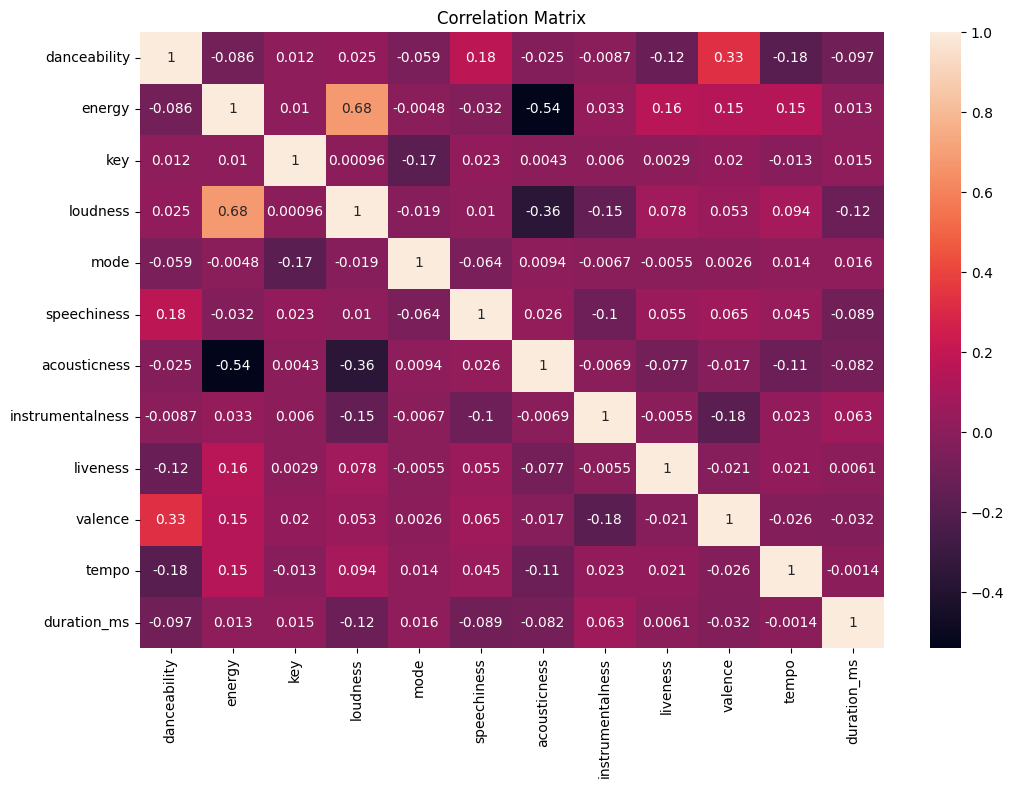

In [83]:
#CORRELATION MATRIX
df1=df.loc[:,["danceability","energy", "key","loudness","mode","speechiness","acousticness","instrumentalness","liveness","valence","tempo","duration_ms"]]           
corr_matrix = df1.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix,annot=True)
plt.title('Correlation Matrix')
plt.show()

In [56]:
df2=df1=df.loc[:,["energy","danceability"]]#importing features

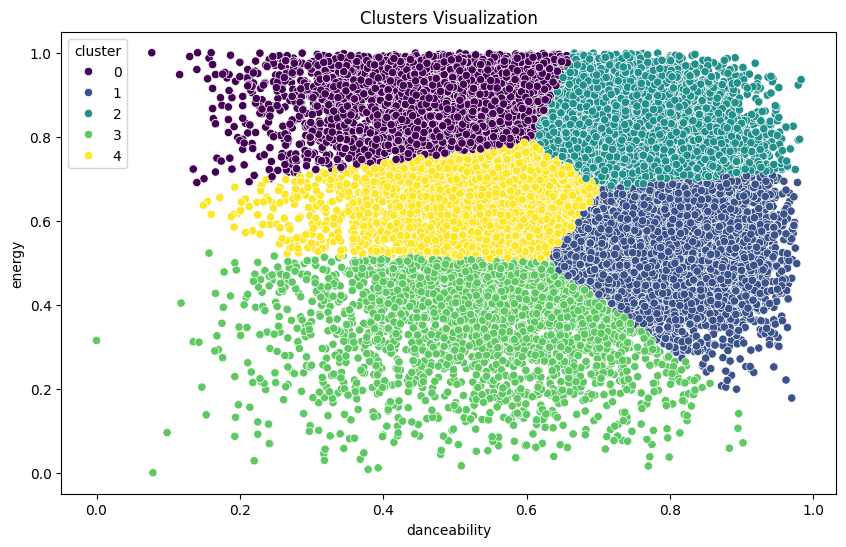

In [57]:
#CLUSTERING
kmeans = KMeans(n_clusters=5, random_state=42)
df['cluster'] = kmeans.fit_predict(df2)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='danceability', y='energy', hue='cluster', palette='viridis')
plt.title('Clusters Visualization')
plt.show()
#The rest of the clusters were'nt segregated.

In [58]:
X = df1

In [59]:
Y = df.loc[:,["track_album_name"]]

In [60]:
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

In [84]:
kmeans_model = KMeans(n_clusters=5, random_state=42)
kmeans_model.fit(X_train)

KMeans(n_clusters=5, random_state=42)

In [85]:
clusters = kmeans_model.predict(X_test)

In [86]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [87]:
pca = PCA(n_components=2)# Reducing to 2 dimensions for visualization
X_pca = pca.fit_transform(X_scaled)

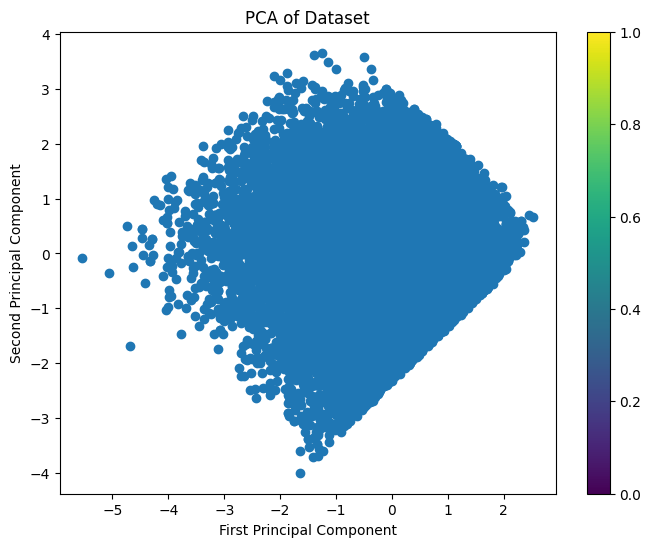

In [88]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 1], X_pca[:, 0])
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA of Dataset')
plt.colorbar() 
plt.show()

In [66]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_scaled)
df['pca1'] = principalComponents[:, 0]
df['pca2'] = principalComponents[:, 1]

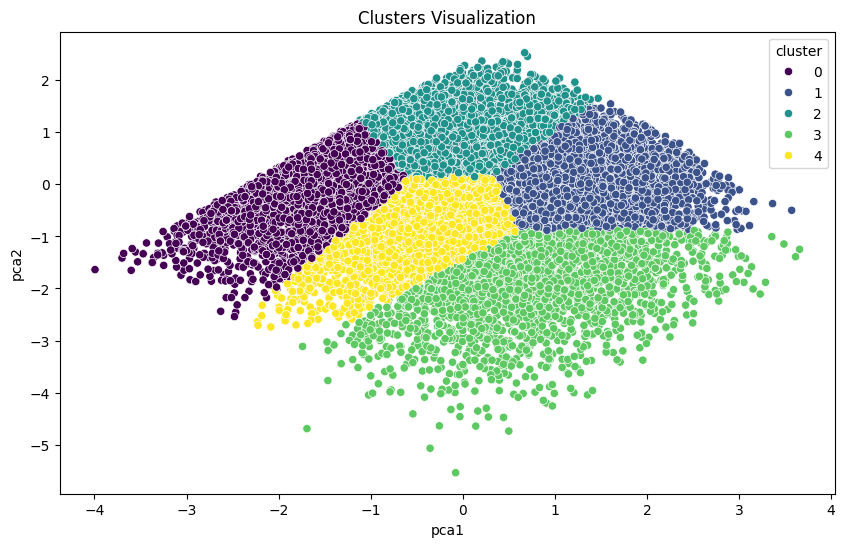

In [67]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='pca1', y='pca2', hue='cluster', palette='viridis')
plt.title('Clusters Visualization')
plt.show()

In [68]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [69]:
pca = PCA(n_components=2)  # For 2D visualization
X_pca = pca.fit_transform(X_scaled)

In [70]:
explained_variance = pca.explained_variance_ratio_

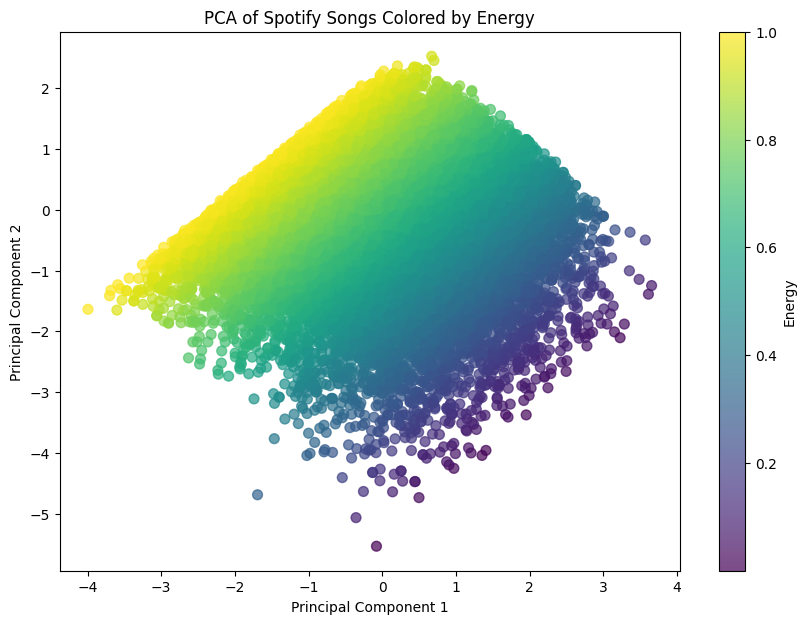

In [71]:
plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['energy'], cmap='viridis', s=50, alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Spotify Songs Colored by Energy')
plt.colorbar(label='Energy')
plt.show()

In [72]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components=2) 
X_pca = pca.fit_transform(X_scaled)

In [73]:
labels = kmeans.labels_

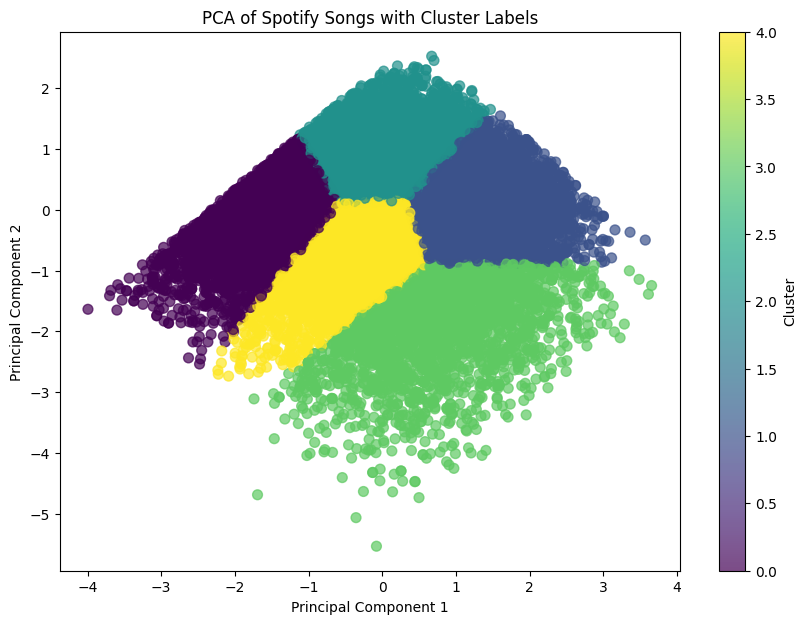

In [74]:
plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=50, alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Spotify Songs with Cluster Labels')
plt.colorbar(label='Cluster')
plt.show()

In [75]:
numerical_features = [
    'acousticness', 'danceability', 'energy', 'instrumentalness', 
    'liveness', 'loudness', 'speechiness', 'tempo', 'valence',
    'duration_ms', 'track_popularity'
]

In [76]:
X_numerical = df[numerical_features]

In [77]:
scaler = StandardScaler()
X_scaled_numerical = scaler.fit_transform(X_numerical)

In [78]:
X_preprocessed = np.hstack((X_scaled_numerical))

In [79]:
X_pca = pca.fit_transform(X_scaled_numerical)

In [80]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_pca)
labels = kmeans.labels_

In [81]:
#FUNCTION FOR SONG RECOMMENATION
def recommend_songs(song_id, num_recommendations=5):
    cluster = df.loc[song_id, 'cluster']
    similar_songs = df[df['cluster'] == cluster]
    recommendations = similar_songs.sample(n=num_recommendations)
    return recommendations[['track_name', 'track_artist', 'playlist_genre']]

In [82]:
id=input ("Enter track id:")
song_id=id
song_id =int(id)
recommendations = recommend_songs(song_id)
print("Here are the recommended songs based on the track ID:")
print(recommendations)

Enter track id: 342


Here are the recommended songs based on the track ID:
                                   track_name    track_artist playlist_genre
15421                         Round and Round            Ratt           rock
28607                                Metaphor            Alok            edm
14867                             PIERREPOINT  Florence Black           rock
29290                    Animals - Radio Edit   Martin Garrix            edm
14068  Bigmouth Strikes Again - 2011 Remaster      The Smiths           rock
